In [1]:
#!pip install geopy
#!pip install python-google-places
import pandas as pd
from datetime import datetime
from geopy.distance import geodesic
import geopy.distance
from geopy.distance import vincenty as VIN
from geopy.distance import great_circle
from googleplaces import GooglePlaces, types, lang
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot
%matplotlib inline

data = pd.read_csv(r"C:\Users\Khaled\Google Drive\Self Development\University of Toronto Data Science Certificate\3250 Foundations of Data Science\Term Project\unique_mls_db_GIT.csv")
cpi=pd.read_csv(r"C:\Users\Khaled\Google Drive\Self Development\University of Toronto Data Science Certificate\3250 Foundations of Data Science\Term Project\CPI.csv")

#coordinates of major go train stations in mississauga and nearby cities: Lisgar, Meadowvale, Streesville, _
#Erindale, Cocksville, Dixie, Kipling, Clarkson, Port Credit, and Long Branch

go_station_msga=[[43.5905809,-79.788362],[43.5976,-79.75369999999998],
                 [43.5762,-79.70910000000003],[43.5670973,-79.6689102],
                 [43.5819,-79.62369999999998],[43.607605,-79.5776749],
                 [43.6357039,-79.5372283],[43.51251816552179,-79.63435649871826],
                 [43.5555,-79.5874],[43.59133291164543,-79.54609036445617]]

#coordinates of major hospitals in mississauga

hospitals_msga = [[43.5713, -79.6084],[43.5594, -79.7033],[43.4507, -79.7639],[43.5733, -79.6097]]


In [2]:
data.head()

,mlsno,stno,stname,city,area,soldprice,solddate,type,style,bdrm,wshrm,latitude,longitude,house_condo,aptno,address
0,E3853125,46,Hinsley,Ajax,Northeast Ajax,595000,6/30/2017,Semi-Detached,2-Storey,3,3,43.891599,-79.028612,house,NaN,"46 Hinsley Cres, Ajax"
1,E3833751,508,Norfolk,Pickering,Amberlea,677000,6/30/2017,Detached,2-Storey,3,3,43.827530,-79.123617,house,NaN,"508 Norfolk Sq, Pickering"
2,N3788507,36,Innisvale,Markham,Cornell,725000,6/30/2017,Semi-Detached,2-Storey,4,3,43.900148,-79.238976,house,NaN,"36 Innisvale Dr, Markham"
3,E3855735,14,Shudell,Toronto E01,Blake-Jones,755000,6/30/2017,Semi-Detached,2-Storey,2,2,43.675379,-79.337634,house,NaN,"14 Shudell Ave, Toronto"
4,W3854388,2500,Hargood,Mississauga,Streetsville,1050000,6/30/2017,Detached,2-Storey,4,3,43.576264,-79.729552,house,NaN,"2500 Hargood Pl, Mississauga"


In [3]:
data.describe()

,soldprice,bdrm,wshrm,latitude,longitude
count,1.955240e+05,195524.000000,195524.000000,195524.000000,195524.000000
mean,7.656679e+05,2.830855,2.653142,43.727473,-79.468918
std,5.719666e+05,1.097000,1.238492,0.136501,0.233164
min,0.000000e+00,0.000000,0.000000,43.288120,-80.127424
25%,4.390000e+05,2.000000,2.000000,43.642452,-79.650354
50%,6.310000e+05,3.000000,2.000000,43.721190,-79.446030
75%,8.880000e+05,4.000000,3.000000,43.822972,-79.345323
max,2.588889e+07,9.000000,35.000000,44.155510,-78.687984


In [4]:
data_msga = data.loc[data['city']=='Mississauga']
data_msga.head()

,mlsno,stno,stname,city,area,soldprice,solddate,type,style,bdrm,wshrm,latitude,longitude,house_condo,aptno,address
4,W3854388,2500,Hargood,Mississauga,Streetsville,1050000,6/30/2017,Detached,2-Storey,4,3,43.576264,-79.729552,house,NaN,"2500 Hargood Pl, Mississauga"
38,W3817888,551,Cavell,Mississauga,Cooksville,668000,6/29/2017,Semi-Detached,Bungalow-Raised,3,2,43.563612,-79.622475,house,NaN,"551 Cavell Dr, Mississauga"
39,W3850685,3582,Birchmeadow,Mississauga,Applewood,670000,6/29/2017,Semi-Detached,Bungalow-Raised,3,2,43.612874,-79.607933,house,NaN,"3582 Birchmeadow Cres, Mississauga"
40,W3848786,4186,Uxbridge,Mississauga,Rathwood,804500,6/29/2017,Detached,2-Storey,3,3,43.616948,-79.613434,house,NaN,"4186 Uxbridge Lane, Mississauga"
42,W3835920,4597,Centretown,Mississauga,Hurontario,889500,6/29/2017,Semi-Detached,2-Storey,4,4,43.595464,-79.664838,house,NaN,"4597 Centretown Way, Mississauga"


In [5]:
def classifyHouseFees():
    
    global data_msga
    house_fees = {'house':1, 'condo':2}
    data_msga['house_fees'] = data_msga['house_condo'].map(house_fees)

In [6]:
def mapHouseArea():
    
    global data_msga
    house_area = {'Streetsville':1, 'Cooksville':2,'Applewood':3,'Rathwood':4,'Hurontario':5,'Central Erin Mills':6,'Mineola':7,'Clarkson':8,
                 'City Centre':9,'Meadowvale':10,'Malton':11,'Erin Mills':12,'Churchill Meadows':13,'Lisgar':14,'Port Credit':15,'East Credit':16,
                 'Creditview':17,'Meadowvale Village':18,'Lorne Park':19,'Fairview':20,'Mississauga Valleys':21,
                 'Erindale':22,'Sheridan':23,'Dixie':24,'Northeast':25,'Mavis-Erindale':26,'Gateway':27,
                 'Meadowvale Business Park':28,'Sheridan Park':29,'Southdown':30,'Port Credi':31,'City Centr':32,
                  'Lakeview':33,'Huttonville':34}    
    
    data_msga['house_area'] = data_msga['area'].map(house_area)

In [7]:
def adjustSoldPrice():
    
    global data_msga
    #add soldyear, soldmonth columns
    data_msga.loc[:,['solddate']] = pd.to_datetime(data_msga['solddate'])
    data_msga.insert(len(data_msga.columns),column='soldyear',value=pd.DatetimeIndex(data_msga['solddate']).year)
    data_msga.insert(len(data_msga.columns),column='soldmonth',value=pd.DatetimeIndex(data_msga['solddate']).month)

    #merge with CPI file and convert nominal sold prices to real sold prices with base case = 2015-07-31 

    cpi_targetrange=cpi[(pd.to_datetime(cpi['Date'])>=datetime(2015,7,1)) & (pd.to_datetime(cpi['Date'])<=datetime(2017,6,30))]
    cpi_targetrange.insert(len(cpi_targetrange.columns),column='soldyear',
                           value=pd.DatetimeIndex(cpi_targetrange['Date']).year)
    cpi_targetrange.insert(len(cpi_targetrange.columns),column='soldmonth',
                           value=pd.DatetimeIndex(cpi_targetrange['Date']).month)
    data_msga=pd.merge(cpi_targetrange, data_msga, on=['soldyear','soldmonth'], how='outer')
    cpibase=float(cpi_targetrange['PX_LAST'][pd.to_datetime(cpi_targetrange['Date'])==datetime(2015,7,31)])
    data_msga.insert(len(data_msga.columns),column='cpibase',value=cpibase)
    data_msga.insert(len(data_msga.columns),column='adjustedSoldPrice',value=
                    round(data_msga['soldprice']*data_msga['cpibase']/data_msga['PX_LAST'],0))

In [8]:
#take a house's coordinates and calculate minimum distance of a house to GO stations 
def closestGoHospital():
    global data_msga
    
    data_msga_coordinate = data_msga[['latitude','longitude']].values
    mindist_GO = []
    mindist_Hospital = []
    for i in range(len(data_msga_coordinate)):
        tempGO = []
        tempHospital = []
        for j in range(len(go_station_msga)):
            tempGO.append(geodesic(go_station_msga[j], data_msga_coordinate[i]).meters)
        mindist_GO.append(round(min(tempGO), 2))

        for j in range(len(hospitals_msga)):
            tempHospital.append(geodesic(hospitals_msga[j], data_msga_coordinate[i]).meters)
        mindist_Hospital.append(round(min(tempHospital),2))
        
    #add the minimum distance to the dataframe

    data_msga.insert(len(data_msga.columns),column='mindist_GO',value=mindist_GO)
    data_msga.insert(len(data_msga.columns),column='mindist_Hospital',value=mindist_Hospital)

In [9]:
def classifySeasons():
    
    global data_msga
    data_msga['season'] = ''
    #summer season is from April to August
    data_msga.loc[(data_msga.soldmonth<=8 ) & (data_msga.soldmonth >=4),'season']= '1'
    
    #shoulder season from September to November
    data_msga.loc[(data_msga.soldmonth<=11 ) & (data_msga.soldmonth >=9),'season']= '2'
    
    #winter season from December to March
    data_msga.loc[(data_msga.soldmonth==12 ) | (data_msga.soldmonth >=1) & (data_msga.soldmonth <=3),'season']= '3' 

In [10]:
classifyHouseFees()
mapHouseArea()    
adjustSoldPrice()
closestGoHospital()
classifySeasons()

C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Khaled\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [11]:
#clean unwanted coloumns
data_msga.drop(['area','soldyear','house_condo','soldmonth','city','stno','stname','PX_LAST','style','cpibase','aptno','mlsno','type','address','solddate','soldprice'], axis=1,inplace = True)

In [12]:
data_msga

,Date,bdrm,wshrm,latitude,longitude,house_fees,house_area,adjustedSoldPrice,mindist_GO,mindist_Hospital,season
0,2017-06-30,4,3,43.576264,-79.729552,1,1,1025038.0,1652.02,2829.88,1
1,2017-06-30,3,2,43.563612,-79.622475,1,2,652120.0,2034.26,1422.18,1
2,2017-06-30,3,2,43.612874,-79.607933,1,3,654072.0,2511.87,4399.19,1
3,2017-06-30,3,3,43.616948,-79.613434,1,4,785375.0,3067.71,4858.85,1
4,2017-06-30,4,4,43.595464,-79.664838,1,5,868354.0,3168.72,5070.10,1
5,2017-06-30,4,4,43.605000,-79.667619,1,5,883485.0,4212.47,5828.68,1
6,2017-06-30,4,3,43.573708,-79.716757,1,6,1034801.0,677.66,1925.86,1
7,2017-06-30,4,4,43.616094,-79.650311,1,5,1029919.0,4364.62,5775.82,1
8,2017-06-30,2,2,43.569918,-79.576084,1,7,1054325.0,1844.45,2615.11,1
9,2017-06-30,4,4,43.565605,-79.694308,1,6,1425291.0,1677.39,1001.50,1


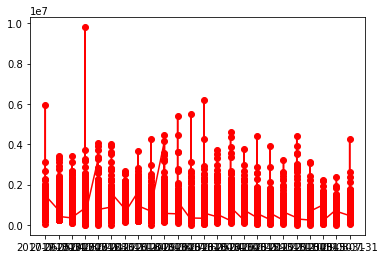

In [13]:
#Check if any value in the dataframe is Null
data_msga.isnull().values.any()

plt.plot(data_msga['Date'],data_msga['adjustedSoldPrice'],'r-o')